In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Projekt_Hana.csv')

In [3]:
data.head(3)

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog
0,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,1,2017,0,0
1,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,1,2018,11146,1
2,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,1,2019,11465,1


In [4]:
data.dtypes

Item_name       object
Item_code        int64
Outlet          object
Outlet_place    object
Outlet_type     object
Month            int64
Year             int64
Units            int64
Katalog          int64
dtype: object

In [5]:
data.describe()

,Item_code,Month,Year,Units,Katalog
count,1.603800e+04,16038.000000,16038.000000,16038.000000,16038.000000
mean,6.232943e+06,6.000000,2017.666667,26922.956915,0.284075
std,2.199145e+05,3.559137,0.666687,33901.881188,0.450987
min,5.977127e+06,1.000000,2017.000000,-34713.000000,0.000000
25%,5.977127e+06,3.000000,2017.000000,4459.000000,0.000000
50%,6.207691e+06,6.000000,2018.000000,17197.000000,0.000000
75%,6.514010e+06,9.000000,2018.000000,35669.000000,1.000000
max,6.514010e+06,12.000000,2019.000000,472930.000000,1.000000


In [6]:
data.isnull().sum()

Item_name       0
Item_code       0
Outlet          0
Outlet_place    0
Outlet_type     0
Month           0
Year            0
Units           0
Katalog         0
dtype: int64

# 1. Cleaning and transforming data

There is no missing data!! But if we look to outlet  type:

In [7]:
data.Outlet_type.unique()

array(['Mali supermarket', 'Large supermarket ', 'Srednji supermarket',
       'Hipermarketi        ', 'Unknown             ',
       'Horeca              ', 'Large vel.prod.     ',
       'Large supermarket', 'Large supermarket    ', 'Srednje vel.prod.',
       'Male prodavaonice', 'Mali supermaket', 'Large supermaket',
       'Small vel.prod.', 'Unknown'], dtype=object)

In [8]:
data[data.Outlet_type=='Unknown'].head(5)

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog
9936,Artikl_SM 130G,6514010,SPAR DOO,SPAR HRVATSKA DOO,Unknown,1,2017,0,0
9937,Artikl_SM 130G,6514010,SPAR DOO,SPAR HRVATSKA DOO,Unknown,1,2018,0,1
9938,Artikl_SM 130G,6514010,SPAR DOO,SPAR HRVATSKA DOO,Unknown,1,2019,0,0
9939,Artikl_SM 130G,6514010,SPAR DOO,SPAR HRVATSKA DOO,Unknown,2,2017,0,0
9940,Artikl_SM 130G,6514010,SPAR DOO,SPAR HRVATSKA DOO,Unknown,2,2018,0,0


In [9]:
data[data.Outlet_type=='Unknown'].Units.unique()

array([0], dtype=int64)

Outlet type unkown doesn't have registered units beacuse ordered units in this types are 0 for every year and month. Which means that we can drop that data.

Only we need to see in which percentage is this data drom all data?

In [10]:
data[data.Outlet_type=='Unknown'].shape[0] # 162 rows

162

In [11]:
data.shape[0]

16038

In [12]:
data[data.Outlet_type=='Unknown'].shape[0]/data.shape[0]*100

1.0101010101010102

We have 1% of data that is missing, because of small percentage we can drop that data!

In [13]:
data=data[data.Outlet_type != 'Unknown']

In [14]:
data.head(5)

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog
0,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,1,2017,0,0
1,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,1,2018,11146,1
2,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,1,2019,11465,1
3,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,2,2017,0,0
4,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,2,2018,8599,0


In [15]:
data[data.Outlet_type=='Unknown']

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog


In [16]:
data[data.Outlet == 'PLODINE DD']

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog
0,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,1,2017,0,0
1,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,1,2018,11146,1
2,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,1,2019,11465,1
3,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,2,2017,0,0
4,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,2,2018,8599,0
5,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,2,2019,8599,0
6,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,3,2017,0,0
7,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,3,2018,11465,0
8,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,3,2019,14331,0
9,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,Mali supermarket,4,2017,0,0


We still have rows that are unkown but with some other characters, maybe space or something!

In [17]:
data.Outlet_type.unique()

array(['Mali supermarket', 'Large supermarket ', 'Srednji supermarket',
       'Hipermarketi        ', 'Unknown             ',
       'Horeca              ', 'Large vel.prod.     ',
       'Large supermarket', 'Large supermarket    ', 'Srednje vel.prod.',
       'Male prodavaonice', 'Mali supermaket', 'Large supermaket',
       'Small vel.prod.'], dtype=object)

In [18]:
data[data.Outlet_type == 'Unknown             '].shape[0]

81

Becacuse of small number we can drop that data also!

In [19]:
data = data[data.Outlet_type != 'Unknown             ']           

In [20]:
data.Outlet_type.unique()

array(['Mali supermarket', 'Large supermarket ', 'Srednji supermarket',
       'Hipermarketi        ', 'Horeca              ',
       'Large vel.prod.     ', 'Large supermarket',
       'Large supermarket    ', 'Srednje vel.prod.', 'Male prodavaonice',
       'Mali supermaket', 'Large supermaket', 'Small vel.prod.'],
      dtype=object)

In [21]:
data.Outlet_type=data.Outlet_type.replace('Horeca              ','Horeca')

In [22]:
data.Outlet_type.unique()

array(['Mali supermarket', 'Large supermarket ', 'Srednji supermarket',
       'Hipermarketi        ', 'Horeca', 'Large vel.prod.     ',
       'Large supermarket', 'Large supermarket    ', 'Srednje vel.prod.',
       'Male prodavaonice', 'Mali supermaket', 'Large supermaket',
       'Small vel.prod.'], dtype=object)

In [23]:
data.Outlet_type=data.Outlet_type.replace('Hipermarketi        ','Hipermarketi')

In [24]:
data.Outlet_type.unique()

array(['Mali supermarket', 'Large supermarket ', 'Srednji supermarket',
       'Hipermarketi', 'Horeca', 'Large vel.prod.     ',
       'Large supermarket', 'Large supermarket    ', 'Srednje vel.prod.',
       'Male prodavaonice', 'Mali supermaket', 'Large supermaket',
       'Small vel.prod.'], dtype=object)

In [25]:
data.Outlet_type=data.Outlet_type.replace('Large vel.prod.     ','LargeVelProd')

In [26]:
data.Outlet_type.unique()

array(['Mali supermarket', 'Large supermarket ', 'Srednji supermarket',
       'Hipermarketi', 'Horeca', 'LargeVelProd', 'Large supermarket',
       'Large supermarket    ', 'Srednje vel.prod.', 'Male prodavaonice',
       'Mali supermaket', 'Large supermaket', 'Small vel.prod.'],
      dtype=object)

We will rename all types just to have a prettier data!

In [27]:
data.Outlet_type=data.Outlet_type.replace('Mali supermarket','MaliSupermarket')

In [28]:
data.Outlet_type=data.Outlet_type.replace('Large supermarket ','LargeSupermarket')

In [29]:
data.Outlet_type=data.Outlet_type.replace('Srednji supermarket','SrednjiSupermarket')

In [30]:
data.Outlet_type=data.Outlet_type.replace('Large supermarket','LargeSupermarket')

In [31]:
data.Outlet_type=data.Outlet_type.replace('Large supermarket    ','LargeSupermarket')

In [32]:
data.Outlet_type=data.Outlet_type.replace('Srednje vel.prod.','SrednjeVelProd')

In [33]:
data.Outlet_type=data.Outlet_type.replace('Male prodavaonice','MaleProdavaonice')

In [34]:
data.Outlet_type=data.Outlet_type.replace('Mali supermaket','MaliSupermarket')

In [35]:
data.Outlet_type=data.Outlet_type.replace('Small vel.prod.','SmallVelProd')

In [36]:
data.Outlet_type.unique()

array(['MaliSupermarket', 'LargeSupermarket', 'SrednjiSupermarket',
       'Hipermarketi', 'Horeca', 'LargeVelProd', 'SrednjeVelProd',
       'MaleProdavaonice', 'Large supermaket', 'SmallVelProd'],
      dtype=object)

In [37]:
data.Outlet_type=data.Outlet_type.replace('Large supermaket','LargeSupermarket')

In [38]:
data.Outlet_type.unique()

array(['MaliSupermarket', 'LargeSupermarket', 'SrednjiSupermarket',
       'Hipermarketi', 'Horeca', 'LargeVelProd', 'SrednjeVelProd',
       'MaleProdavaonice', 'SmallVelProd'], dtype=object)

We can now see that we actually have :

In [39]:
data.Outlet_type.nunique()

9

9 types of Outlets!!

i will not split data by cities beacuse i want to find out overall units by outlet and by item.

# Visualization of data!

First look into year 2017!

In [40]:
data_2017=data[data.Year == 2017]

In [41]:
data_2017.head()

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog
0,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,2017,0,0
3,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,2,2017,0,0
6,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,3,2017,0,0
9,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,4,2017,0,0
11,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,5,2017,0,0


We can see that arounf 6th month there is big increase in ordering smoki product line 225G.

Let's see other lines : 130 g and 40 g.

In [42]:
data.Item_code.unique()

array([6207691, 6514010, 5977127], dtype=int64)

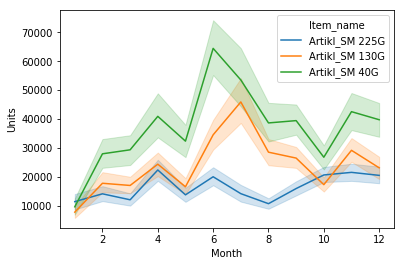

In [43]:
sns.lineplot(x='Month', y='Units', hue='Item_name', data=data_2017) # we can do also by artikl code,plot is the same but then legend is little bit messier.

In [44]:
# there is a problem with item code - mybe we need to cast them into string!!

In [45]:
data_2017_250=data_2017[data_2017.Item_name=='Artikl_SM 225G']

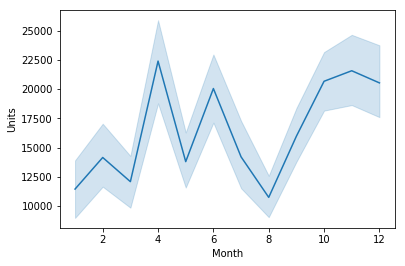

In [46]:
sns.lineplot(x='Month', y='Units', data=data_2017_250)

In [47]:
data_2017_130=data_2017[data_2017.Item_name=='Artikl_SM 130G']

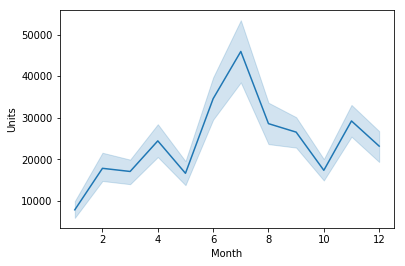

In [48]:
sns.lineplot(x='Month', y='Units', data=data_2017_130)

In [49]:
data_2017_40=data_2017[data_2017.Item_code==5977127]

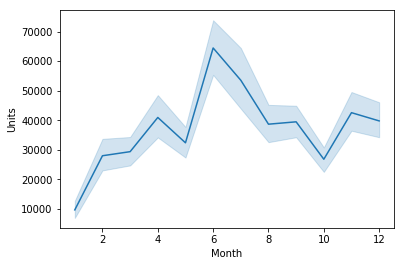

In [50]:
sns.lineplot(x='Month', y='Units', data=data_2017_40)

From first graph we can see that smoki 225G is most stable in sold units, while smoki 40g is most versitile.

In [51]:
data_2018=data[data.Year==2018]

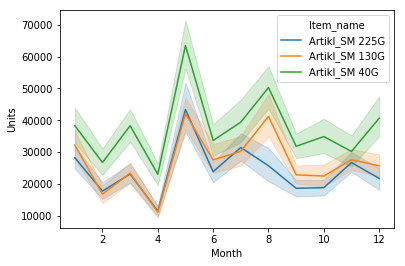

In [52]:
sns.lineplot(x='Month', y='Units', hue='Item_name', data=data_2018)

In 2018 we can see some changes. We can see that smoki 225g increased ordered units, but still smoki 40G is most versitile one.

In [53]:
data_2019=data[data.Year==2019] # in 2019 we only hvae records for first 3 months.

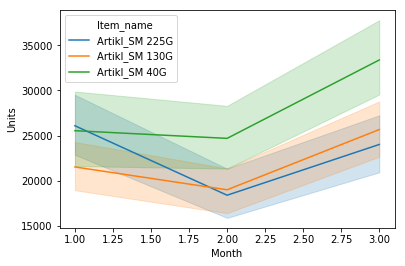

In [54]:
sns.lineplot(x='Month', y='Units', hue='Item_name', data=data_2019)

For now, the lowest point for each line is February!

My goal is to predict remaining month of 2019!

In [55]:
data_2017.Outlet.unique()

array(['PLODINE DD', 'SPAR DOO'], dtype=object)

In [56]:
data_2017_plodine=data_2017[data_2017.Outlet=='PLODINE DD']
data_2017_spar=data_2017[data_2017.Outlet=='SPAR DOO']

Let's see how distribution for year 2017 in outlet plodine!

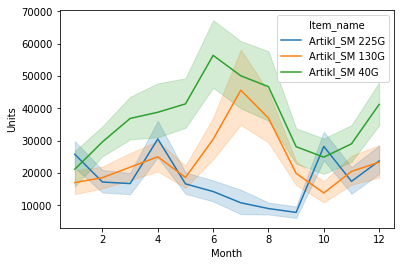

In [57]:
sns.lineplot(x='Month', y='Units', hue='Item_name', data=data_2017_plodine)

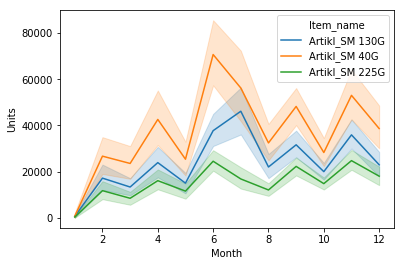

In [58]:
sns.lineplot(x='Month', y='Units', hue='Item_name', data=data_2017_spar)

In [59]:
data_2018_plodine=data_2018[data_2018.Outlet=='PLODINE DD']
data_2018_spar=data_2018[data_2018.Outlet=='SPAR DOO']
data_2019_plodine=data_2019[data_2019.Outlet=='PLODINE DD']
data_2019_spar=data_2019[data_2019.Outlet=='SPAR DOO']

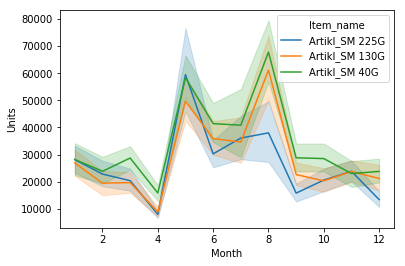

In [60]:
sns.lineplot(x='Month', y='Units', hue='Item_name', data=data_2018_plodine)

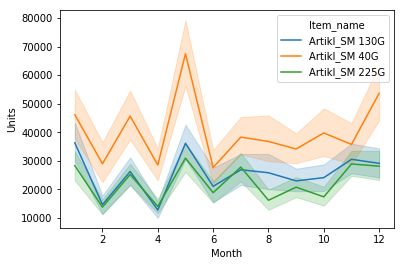

In [61]:
sns.lineplot(x='Month', y='Units', hue='Item_name', data=data_2018_spar)

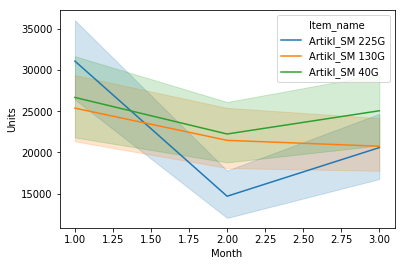

In [62]:
sns.lineplot(x='Month', y='Units', hue='Item_name', data=data_2019_plodine)

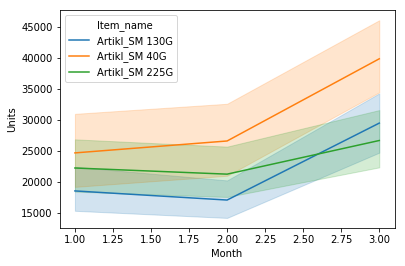

In [63]:
sns.lineplot(x='Month', y='Units', hue='Item_name', data=data_2019_spar)

Dummy variables that come to my mind are mybe for outlet some areas (županije) or somewhere the number of units is negative which means that there were return.

What if we look number of ordered units hue to type of outlet?

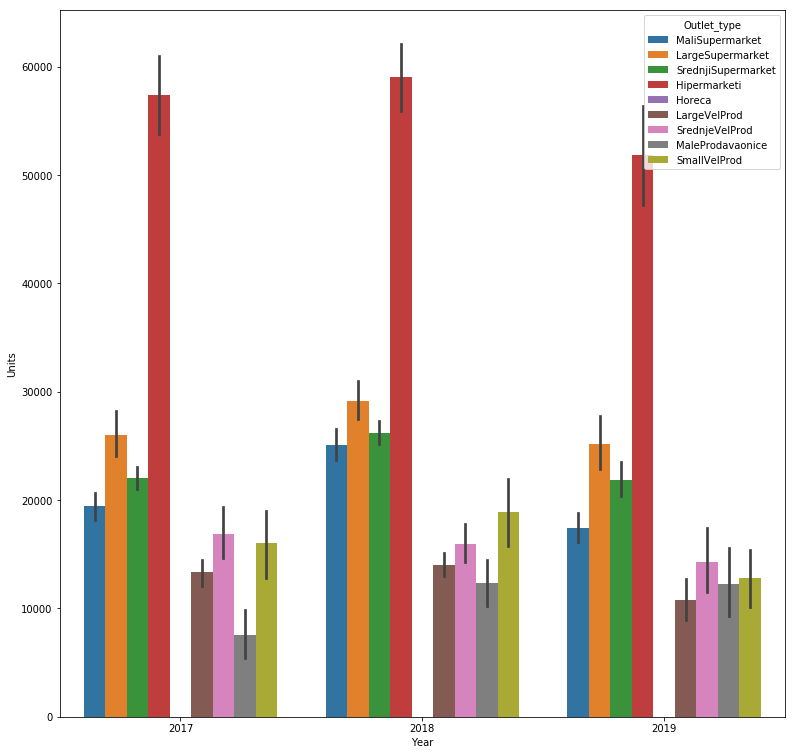

In [64]:
plt.figure(figsize=(13,13))
sns.barplot(x='Year', y='Units', hue='Outlet_type', data=data)

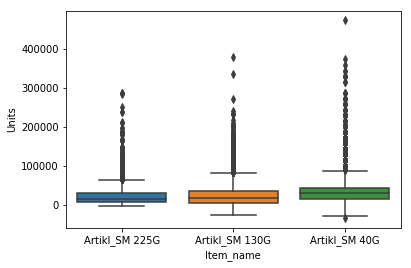

In [65]:
sns.boxplot(x='Item_name', y='Units', data=data)

In [66]:
data[data.Units > 400000]

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog
11382,Artikl_SM 40G,5977127,SPAR DOO,SPAR ZADAR SUPERNOVA,LargeSupermarket,7,2017,472930,0


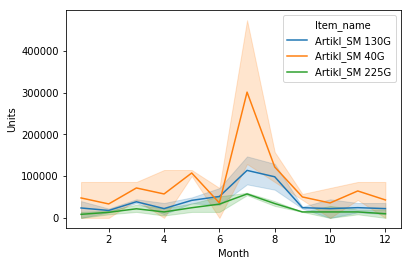

In [67]:
sns.lineplot(x='Month', y='Units', hue='Item_name', data=data[data.Outlet_place=='SPAR ZADAR SUPERNOVA'])

Probably that this is not outlier considered that is created in summer. Lets check number of ordered units next year?

In [68]:
data[(data.Outlet_place == 'SPAR ZADAR SUPERNOVA') & (data.Month==7) & (data.Year==2018)]

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog
9709,Artikl_SM 130G,6514010,SPAR DOO,SPAR ZADAR SUPERNOVA,LargeSupermarket,7,2018,80255,0
11383,Artikl_SM 40G,5977127,SPAR DOO,SPAR ZADAR SUPERNOVA,LargeSupermarket,7,2018,128981,0
14677,Artikl_SM 225G,6207691,SPAR DOO,SPAR ZADAR SUPERNOVA,LargeSupermarket,7,2018,60191,0


There was a lot smaller ordered units next year!

In [69]:
data[(data.Outlet_place == 'SPAR ZADAR SUPERNOVA') & (data.Month==7) & (data.Year==2017) & (data.Item_name=='Artikl_SM 130G')]

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog
9708,Artikl_SM 130G,6514010,SPAR DOO,SPAR ZADAR SUPERNOVA,LargeSupermarket,7,2017,147134,0


In [70]:
data[(data.Outlet_place == 'SPAR ZADAR SUPERNOVA') & (data.Month==7) & (data.Year==2018) & (data.Item_name=='Artikl_SM 130G')]

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog
9709,Artikl_SM 130G,6514010,SPAR DOO,SPAR ZADAR SUPERNOVA,LargeSupermarket,7,2018,80255,0


In [71]:
data[(data.Outlet_place == 'SPAR ZADAR SUPERNOVA') & (data.Month==7) & (data.Year==2017) & (data.Item_name=='Artikl_SM 225G')]

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog
14676,Artikl_SM 225G,6207691,SPAR DOO,SPAR ZADAR SUPERNOVA,LargeSupermarket,7,2017,54459,0


In [72]:
data[(data.Outlet_place == 'SPAR ZADAR SUPERNOVA') & (data.Month==7) & (data.Year==2018) & (data.Item_name=='Artikl_SM 225G')]

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog
14677,Artikl_SM 225G,6207691,SPAR DOO,SPAR ZADAR SUPERNOVA,LargeSupermarket,7,2018,60191,0


In [73]:
data[data.Units < 0].Units.nunique() # This data marks returnes. What we can do is mark them as 0 and create dummy that will say 1 if there was returnes, and 0 if there were not!

23

In [74]:
def create_D(data):
    if data['Units'] < 0 :
        return 1
    else:
        return 0

In [75]:
data['Returned']=data.apply(create_D, axis=1)

In [76]:
data_item=data.groupby(['Item_name'], as_index=False).Units.sum()

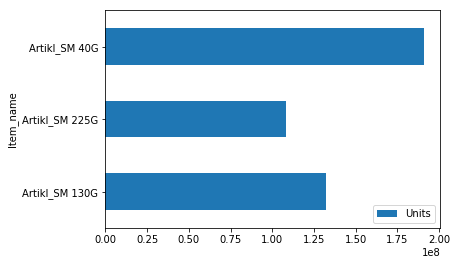

In [77]:
data_item.plot(kind ="barh", x = 'Item_name', y = 'Units')

We can see that smoki 40 G is the most sold item.

In [78]:
data_outlet=data.groupby(['Outlet'], as_index=False).Units.sum()

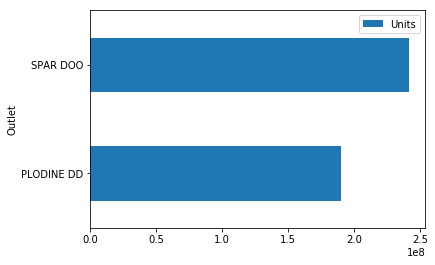

In [79]:
data_outlet.plot(kind ="barh", x = 'Outlet', y = 'Units')

Also spar is selling bigger amounts of units!

In [80]:
data_plodine=data[data.Outlet=='PLODINE DD']

In [81]:
dataPlodinePivot = pd.pivot_table(data_plodine, values = "Units", 
                             columns = "Year", index = "Month")

In [82]:
dataPlodinePivot

Year,2017,2018,2019
Month,,,
1,21344.549020,27759.933333,27712.176471
2,21818.388235,22059.886275,19466.658824
3,25155.439216,22947.980392,22134.301961
4,31469.058824,10901.623529,NaN
5,25567.952941,55839.870588,NaN
6,33715.447059,35870.098039,NaN
7,35516.619608,37188.929412,NaN
8,30914.423529,55646.262745,NaN
9,18627.639216,22426.349020,NaN


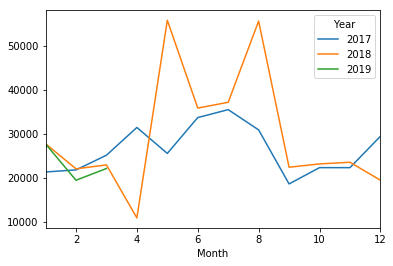

In [83]:
dataPlodinePivot.plot()

In [84]:
data_spar=data[data.Outlet=='SPAR DOO']

In [85]:
dataSparPivot = pd.pivot_table(data_spar, values = "Units", 
                             columns = "Year", index = "Month")

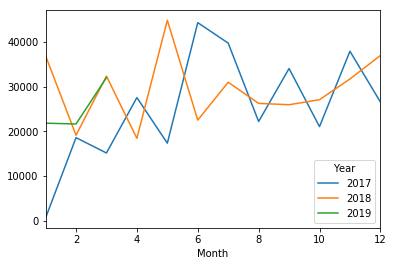

In [86]:
dataSparPivot.plot()

Spar selling units are more stable than Plodine.

3. Which outlets are the most significant?

In [87]:
data_city=data.groupby(['Outlet_place'], as_index=False).Units.sum()

In [88]:
data_city = data_city.sort_values(by = "Units", ascending = False)

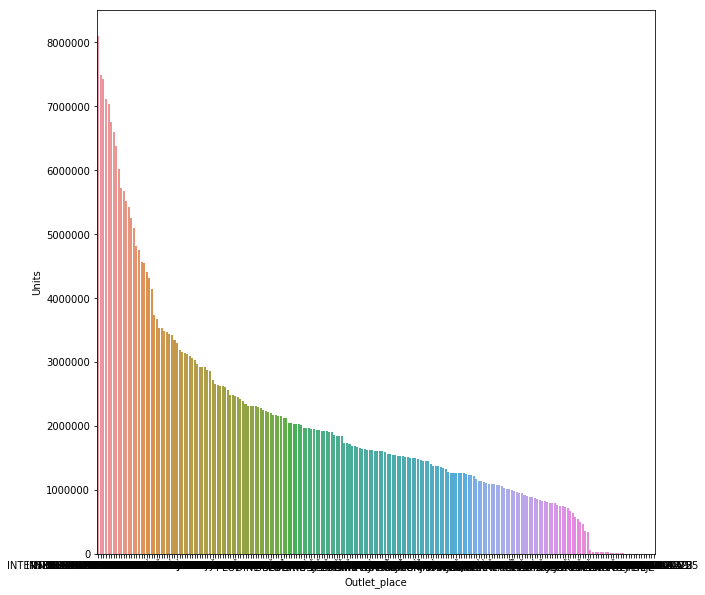

In [89]:
plt.figure(figsize=(10,10))
sns.barplot(x=data_city.Outlet_place, y=data_city.Units)

Distribution with sol units more than 3000000 ?

In [90]:
data_city_3000=data_city[data_city.Units > 3000000]

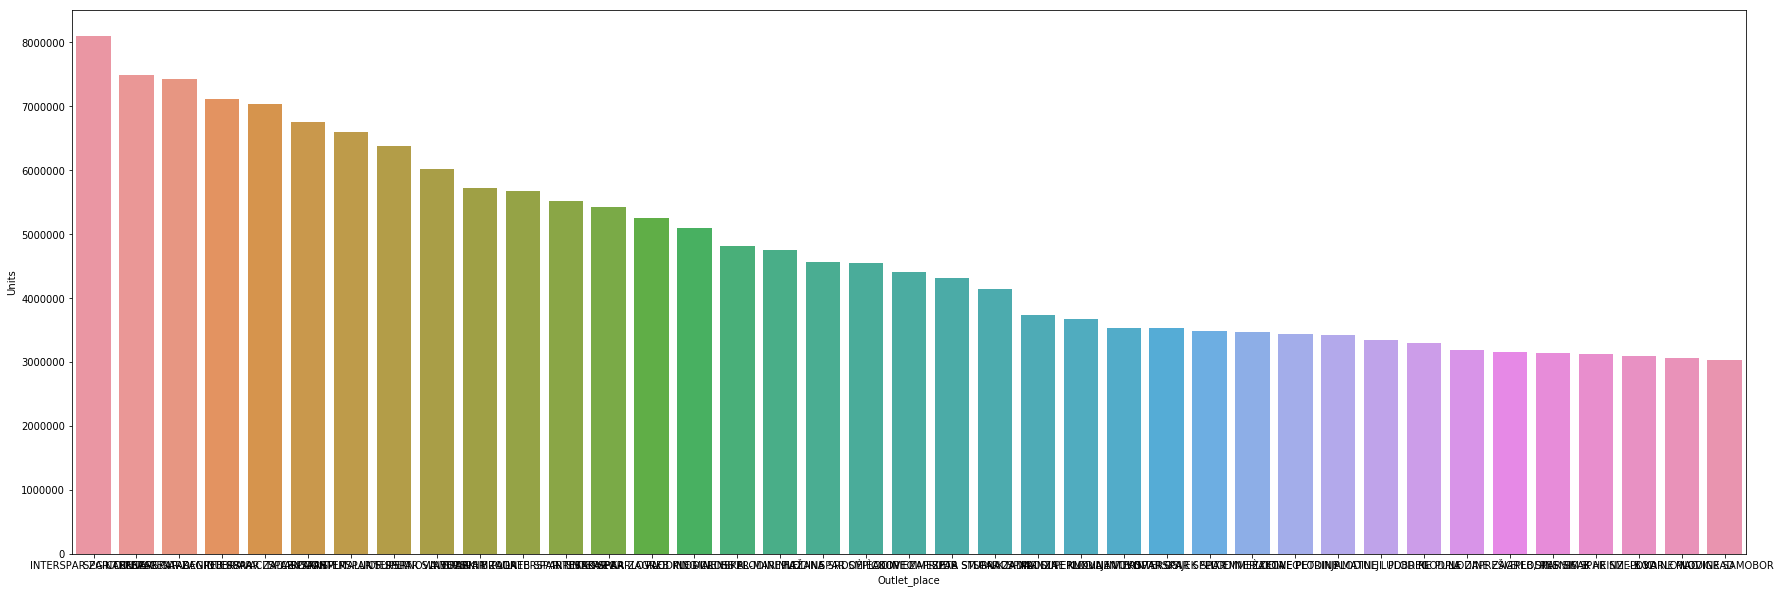

In [91]:
plt.figure(figsize=(30,10))
sns.barplot(x=data_city_3000.Outlet_place, y=data_city_3000.Units)

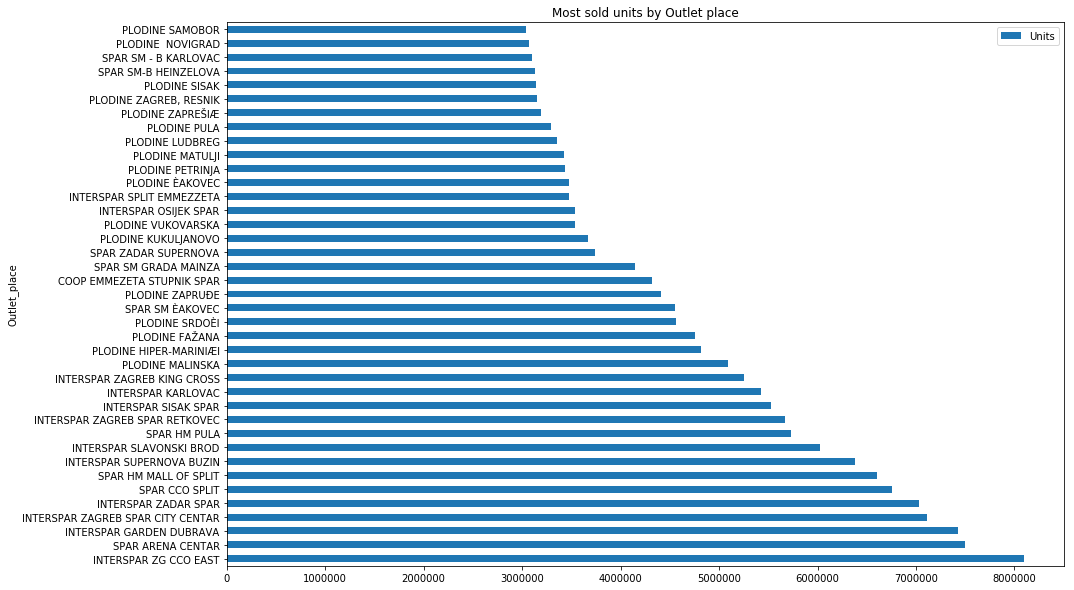

In [92]:
data_city_3000.plot(kind ="barh", x = 'Outlet_place', y = 'Units', figsize=(15,10), title='Most sold units by Outlet place')

We can see here which outlet places are selling our proudct in big numbers!

# Time series analysis
* we want to predict rest of the 2019 by month sold units

Components of time series:
* Trend - sales were up for first year and suddenly goes down
* Seasonality - christmas - bigger solds
* irregularity - noise - unsistematic - residuals - for example disaster happens - random variation
* cyclic - they keep on repeeting

Time series can't be used if values are constant!!

Where variables are connected with function!

Stationarity - TS has particular behaviour time , there is very high probability that it will follow the same in the future
* constant mean - average
* constant variance - distance from the mean
* autocovariance that does not depend on time

Test to check stationarity
1. Rolling Statistics
- plot moving average or moving variance and see if it varies with time - visual approach
2. ADCF test
 - null hypothesis is that the TS is non stationarity - test results comprise of test statistics and some critical values
 
 
How to improve stationarity??
* take natural logarithm of data
* substract moving average of data from data
* create The exponential moving average (EMA) is a weighted average of the last n prices, where the weighting decreases exponentially with each previous price/period. In other words, the formula gives recent prices more weight than past prices
* substract log data and ema
* shifting data for some period of time and then substract it from real data

# ARIMA model!
* AR - auto regressive + MA - moving average

 - P - autoregressive lag
 - d - is the number of differencing required to make the time series stationary
 - Q - moving average

3 components od ARIMA

* AR model - correlation between the prevoius time period to the current - P

Example : time preiod b - if we find correlation between b and b-1 that is autoregressive part

* finding noise - average forecast of that noise - moving average

# 1. Analysing and forecasting data

In [93]:
data.head()

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog,Returned
0,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,2017,0,0,0
1,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,2018,11146,1,0
2,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,2019,11465,1,0
3,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,2,2017,0,0,0
4,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,2,2018,8599,0,0


In [94]:
# merging months and years together?

In [95]:
data['Date']=data['Year'].apply(str)+'-'+data['Month'].apply(str)

In [96]:
data.head()

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog,Returned,Date
0,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,2017,0,0,0,2017-1
1,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,2018,11146,1,0,2018-1
2,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,2019,11465,1,0,2019-1
3,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,2,2017,0,0,0,2017-2
4,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,2,2018,8599,0,0,2018-2


In [97]:
from datetime import datetime

In [98]:
data['Date']=pd.to_datetime(data['Date'], infer_datetime_format=True)

In [99]:
data.head(3)

,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Month,Year,Units,Katalog,Returned,Date
0,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,2017,0,0,0,2017-01-01
1,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,2018,11146,1,0,2018-01-01
2,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,2019,11465,1,0,2019-01-01


In [100]:
data=data[['Date','Item_name','Item_code','Outlet','Outlet_place','Outlet_type','Katalog','Units','Returned']]

In [101]:
data.head(3)

,Date,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Katalog,Units,Returned
0,2017-01-01,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,0,0,0
1,2018-01-01,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,11146,0
2,2019-01-01,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,11465,0


In [102]:
data_ARIMA=pd.DataFrame(data)

In [103]:
data_ARIMA.head(3)

,Date,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Katalog,Units,Returned
0,2017-01-01,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,0,0,0
1,2018-01-01,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,11146,0
2,2019-01-01,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,11465,0


In [104]:
cols = ['Item_name','Item_code','Outlet','Outlet_place','Outlet_type','Katalog','Returned']
data_ARIMA.drop(cols, axis=1, inplace=True)
data_ARIMA = data_ARIMA.sort_values('Date')
data_ARIMA.isnull().sum()

Date     0
Units    0
dtype: int64

In [105]:
data_ARIMA.head()

,Date,Units
0,2017-01-01,0
4806,2017-01-01,42994
10962,2017-01-01,0
14040,2017-01-01,0
1350,2017-01-01,4586


In [106]:
data_ARIMA = data_ARIMA.groupby('Date')['Units'].sum().reset_index()
data_ARIMA = data_ARIMA.set_index('Date')

In [107]:
data_ARIMA.head()

,Units
Date,
2017-01-01,5644770
2017-02-01,11690750
2017-03-01,11409529
2017-04-01,17111228
2017-05-01,12241153


In [108]:
data_ARIMA.tail()

,Units
Date,
2018-11-01,16466590
2018-12-01,17156970
2019-01-01,14262770
2019-02-01,12100608
2019-03-01,16196787


I created dataset that contains units per month for 2017,2018 and first 3 month of 2019. My goal is to predict the rest of the sales for each outlet!

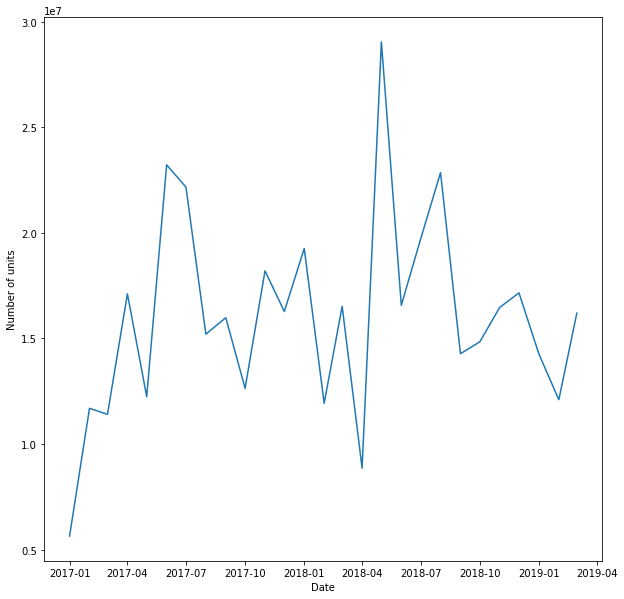

In [109]:
plt.figure(figsize=(10,10))
plt.xlabel('Date')
plt.ylabel('Number of units')
plt.plot(data_ARIMA)

In [110]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

1. We are looking for mean and standard deviation through data to see if it is stationary. From the first look probably it is not sttaionary data.
2. Calculating meand and std by function rolling - calculation mean and std in each month

In [111]:
rolmean=data_ARIMA.rolling(window=12).mean()
rolstd=data_ARIMA.rolling(window=12).std()
print(rolmean,rolstd)

                   Units
Date                    
2017-01-01           NaN
2017-02-01           NaN
2017-03-01           NaN
2017-04-01           NaN
2017-05-01           NaN
2017-06-01           NaN
2017-07-01           NaN
2017-08-01           NaN
2017-09-01           NaN
2017-10-01           NaN
2017-11-01           NaN
2017-12-01  1.514789e+07
2018-01-01  1.628220e+07
2018-02-01  1.630214e+07
2018-03-01  1.672813e+07
2018-04-01  1.604038e+07
2018-05-01  1.743984e+07
2018-06-01  1.688587e+07
2018-07-01  1.668067e+07
2018-08-01  1.731768e+07
2018-09-01  1.717561e+07
2018-10-01  1.735887e+07
2018-11-01  1.721443e+07
2018-12-01  1.728796e+07
2019-01-01  1.687182e+07
2019-02-01  1.688604e+07
2019-03-01  1.685898e+07                    Units
Date                    
2017-01-01           NaN
2017-02-01           NaN
2017-03-01           NaN
2017-04-01           NaN
2017-05-01           NaN
2017-06-01           NaN
2017-07-01           NaN
2017-08-01           NaN
2017-09-01           NaN


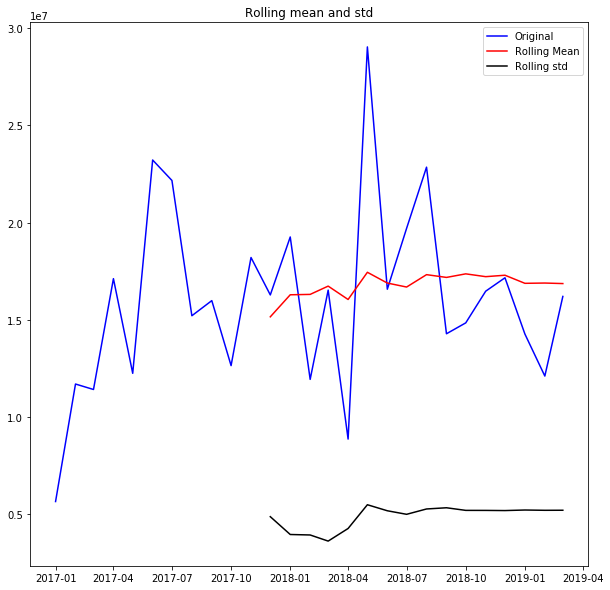

In [112]:
# plotting rolling statistics!
plt.figure(figsize=(10,10))
orig=plt.plot(data_ARIMA, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and std')
plt.show(block=False)

Seeing little unstable mean and unstable std. First attempt to stabilize data is to take natural logarithm od existing data.

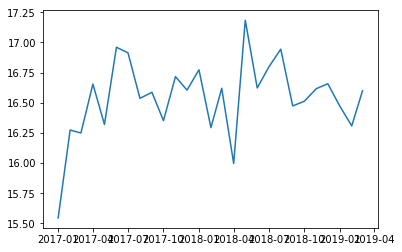

In [113]:
data_ARIMA_logscale=np.log(data_ARIMA)
plt.plot(data_ARIMA_logscale)

A little better picture. Now again , claculating a moving average and std for each month.

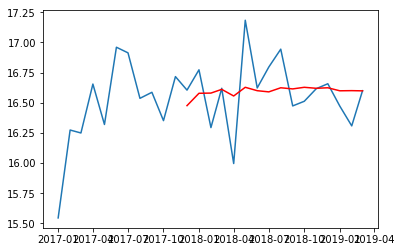

In [114]:
movingAverage=data_ARIMA_logscale.rolling(window=12).mean()
movingSTD=data_ARIMA_logscale.rolling(window=12).std()
plt.plot(data_ARIMA_logscale)
plt.plot(movingAverage, color='red')

In [115]:
from statsmodels.tsa.stattools import adfuller
def test_stat(timeseries):
    
    #determing rolling stats.
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    #plot rolling stat
    plt.figure(figsize=(10,10))
    orig=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and std')
    plt.show(block=False)
    
    #perform DF test:
    print('Results of Dickey-Fuller test:')
    dftest=adfuller(timeseries['Units'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Flags used','Number of observations used'])
    for key, value in dftest[4].items():
        dfoutput["Critical value (%s)"%key]=value
    print(dfoutput)

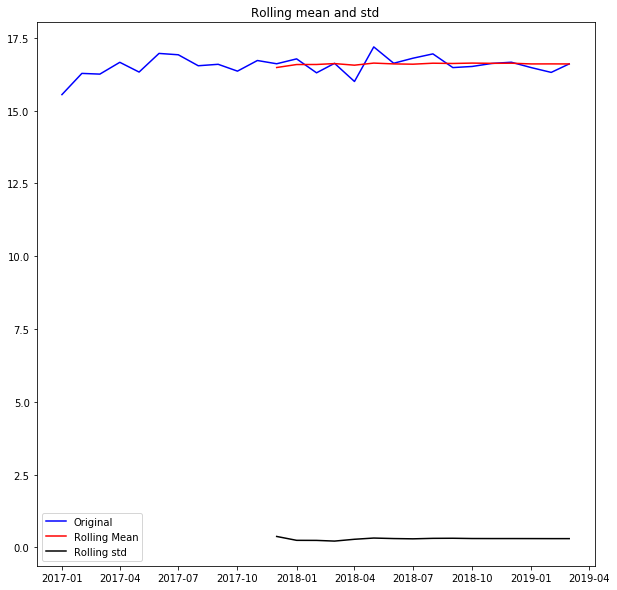

Results of Dickey-Fuller test:
Test Statistic                 -1.938253
p-value                         0.314285
Flags used                      8.000000
Number of observations used    18.000000
Critical value (1%)            -3.859073
Critical value (5%)            -3.042046
Critical value (10%)           -2.660906
dtype: float64


In [116]:
test_stat(data_ARIMA_logscale)

Average mean is still a little bumpy. Now we are substracting moving average from our logarithm data.

In [117]:
data_ARIMA_logscaleMinusMovingAvg=data_ARIMA_logscale-movingAverage
data_ARIMA_logscaleMinusMovingAvg.head(12)

,Units
Date,
2017-01-01,NaN
2017-02-01,NaN
2017-03-01,NaN
2017-04-01,NaN
2017-05-01,NaN
2017-06-01,NaN
2017-07-01,NaN
2017-08-01,NaN
2017-09-01,NaN


Defining function that return parameters for testing stationary!

In [118]:
data_ARIMA_logscaleMinusMovingAvg.dropna(inplace=True)
data_ARIMA_logscaleMinusMovingAvg.head(10)

,Units
Date,
2017-12-01,0.128562
2018-01-01,0.194546
2018-02-01,-0.285932
2018-03-01,0.008820
2018-04-01,-0.559627
2018-05-01,0.555542
2018-06-01,0.022667
2018-07-01,0.205646
2018-08-01,0.319886


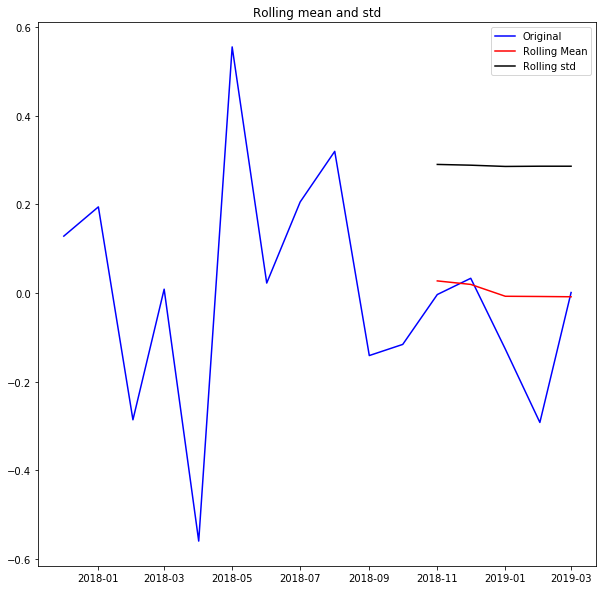

Results of Dickey-Fuller test:
Test Statistic                 -0.898229
p-value                         0.788555
Flags used                      5.000000
Number of observations used    10.000000
Critical value (1%)            -4.331573
Critical value (5%)            -3.232950
Critical value (10%)           -2.748700
dtype: float64


In [119]:
test_stat(data_ARIMA_logscaleMinusMovingAvg)

* Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the time series is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.
* but our p values is still pretty high!

* Instead of equally weighting each of the observation, in the SES model we give more weightage to the recent observations and less to the older ones. This is done by the using a smoothing variable like alpha

In [120]:
exponentialWeightAverage=data_ARIMA_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()

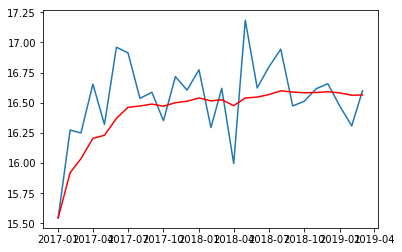

In [121]:
plt.plot(data_ARIMA_logscale)
plt.plot(exponentialWeightAverage, color='red')

In [122]:
# much better and much stable mean!

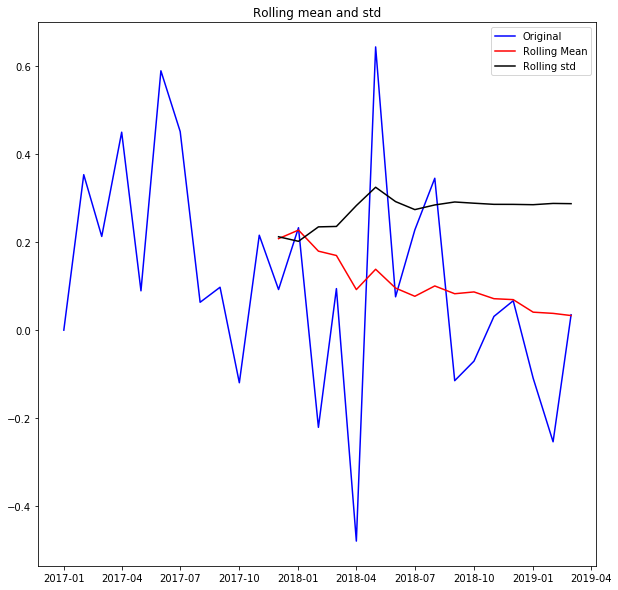

Results of Dickey-Fuller test:
Test Statistic                 -5.129187
p-value                         0.000012
Flags used                      0.000000
Number of observations used    26.000000
Critical value (1%)            -3.711212
Critical value (5%)            -2.981247
Critical value (10%)           -2.630095
dtype: float64


In [123]:
data_ARIMA_logscaleminusmovingExponentialDecayAverage= data_ARIMA_logscale-exponentialWeightAverage
test_stat(data_ARIMA_logscaleminusmovingExponentialDecayAverage)

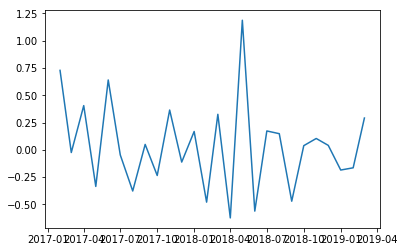

In [124]:
data_ARIMALogDiffShifting=data_ARIMA_logscale-data_ARIMA_logscale.shift()
plt.plot(data_ARIMALogDiffShifting)

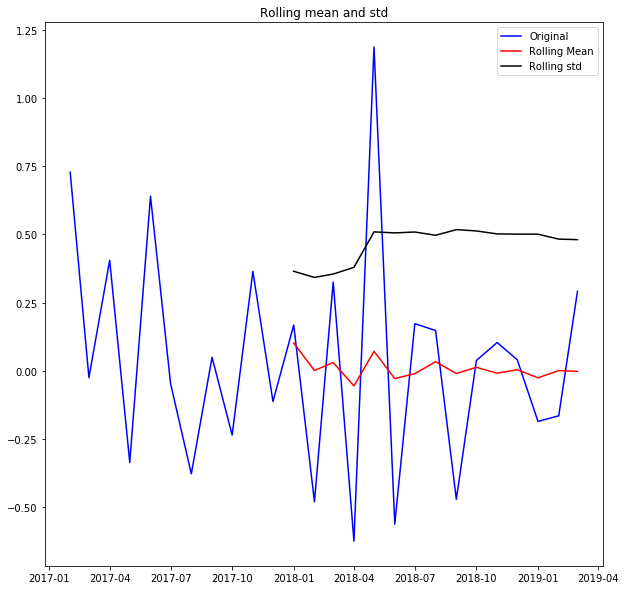

Results of Dickey-Fuller test:
Test Statistic                -1.032879e+01
p-value                        2.878658e-18
Flags used                     0.000000e+00
Number of observations used    2.500000e+01
Critical value (1%)           -3.723863e+00
Critical value (5%)           -2.986489e+00
Critical value (10%)          -2.632800e+00
dtype: float64


In [125]:
data_ARIMALogDiffShifting.dropna(inplace=True)
test_stat(data_ARIMALogDiffShifting)

We now got pretty stable data!

With seasonal decompose we can see trend , seasonality and residuals from our data.
- in some cases, if data is still unstable we can remove one or more of 3 named parts from data

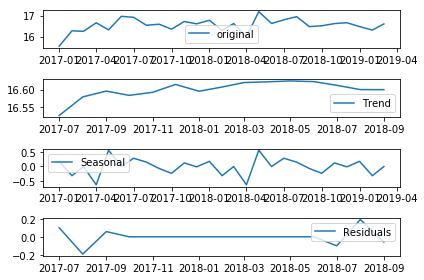

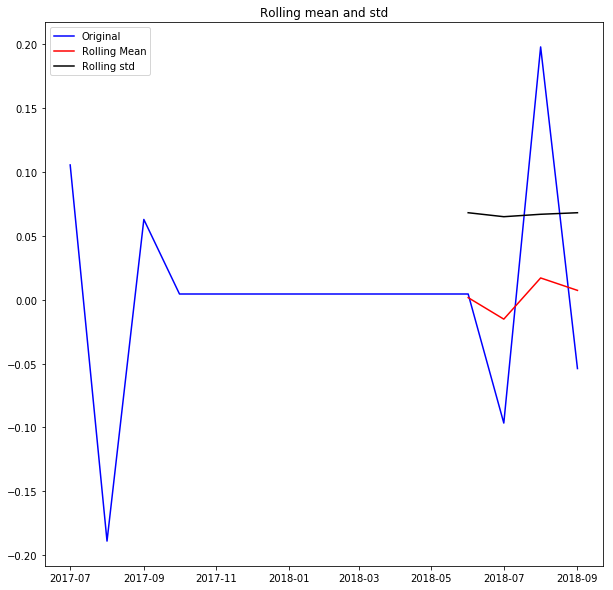

Results of Dickey-Fuller test:
Test Statistic                -0.000000
p-value                        0.958532
Flags used                     8.000000
Number of observations used    6.000000
Critical value (1%)           -5.354256
Critical value (5%)           -3.646238
Critical value (10%)          -2.901198
dtype: float64


C:\Users\Hana\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data_ARIMA_logscale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(data_ARIMA_logscale, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposeddata_ARIMA=residual
decomposeddata_ARIMA.dropna(inplace=True)
test_stat(decomposeddata_ARIMA)

In [127]:
# we can see if we remove residuals, our p value got worse!

In [128]:
RMSE(data_ARIMA_logscale.Units, data_ARIMALogDiffShifting.Units)

16.54144379484202

In [129]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf=acf(data_ARIMALogDiffShifting, nlags=20)
lag_pacf=pacf(data_ARIMALogDiffShifting, nlags=20, method='ols')

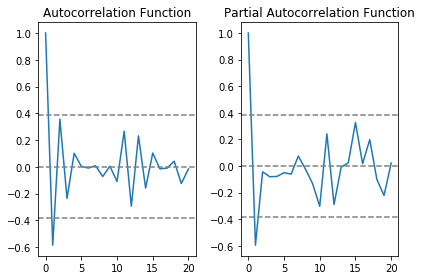

In [130]:
# plotting acf - Q
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(data_ARIMALogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_ARIMALogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plot PACF - P
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(data_ARIMALogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_ARIMALogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [131]:
# we can see that our p value is around 1 , and our q value is also around 1!

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

For fitting into arima model, we need to find values of p,d, and Q.
* p - correlation between prevoius time period and current
* q - moving average

We need to plot acf and pacf graph (autocorrelation and partial) to see which are our values for p,d, and Q. We can also do that over a code without graph but i will to that after plotting.

In [132]:
# we can see that first grapg cuts 0 at 3 or 4 which is our p value and in the secong graph we can see that Q is also around 3,4.

In [133]:
# finding p!

In [134]:
from statsmodels.tsa.arima_model import ARIMA

For order (1,1,1) our RSS is 3.12, for order (2,1,2) our RSS IS 2.99 which is better!!

Best combination is (1,1,2)!!! so our p is 1! and d is also 1

Our combination is (1,1,2)!!

C:\Users\Hana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Hana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\Hana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


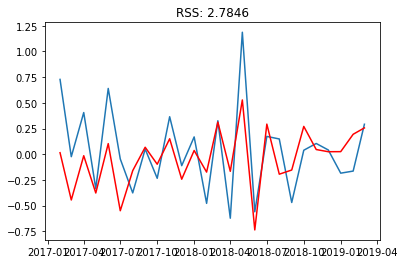

In [135]:
model=ARIMA(data_ARIMA_logscale, order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(data_ARIMALogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum ((results_ARIMA.fittedvalues- data_ARIMALogDiffShifting['Units'])**2))
print('Plotting AR model')

In [136]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2017-02-01    0.014421
2017-03-01   -0.445691
2017-04-01   -0.014971
2017-05-01   -0.377775
2017-06-01    0.102825
dtype: float64


In [137]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2017-02-01    0.014421
2017-03-01   -0.431270
2017-04-01   -0.446241
2017-05-01   -0.824016
2017-06-01   -0.721191
dtype: float64


In [138]:
predictions_ARIMA_log=pd.Series(data_ARIMA_logscale['Units'].ix[0], index=data_ARIMA_logscale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

C:\Users\Hana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2017-01-01    15.546240
2017-02-01    15.560661
2017-03-01    15.114970
2017-04-01    15.099999
2017-05-01    14.722224
dtype: float64

In [225]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)

In [140]:
data_ARIMA_logscale.shape

(27, 1)

In [141]:
# we wanna predict units for the rest of 2019!! we have data for march - missing 9 points!

C:\Users\Hana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


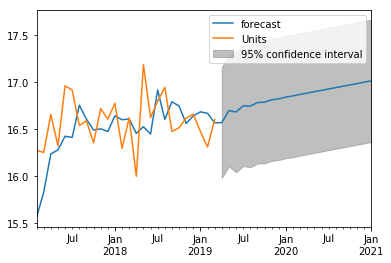

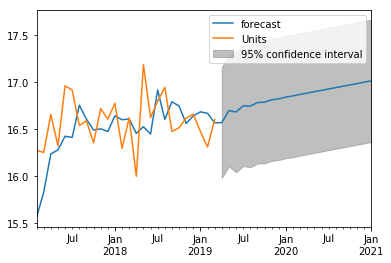

In [142]:
results_ARIMA.plot_predict(1,48)

In [249]:
predictions_ARIMA=pd.DataFrame(predictions_ARIMA)

In [250]:
predictions_ARIMA.columns=['Units']

In [251]:
predictions_ARIMA.head()

,Units
Date,
2017-01-01,5.644770e+06
2017-02-01,5.726763e+06
2017-03-01,3.667315e+06
2017-04-01,3.612819e+06
2017-05-01,2.476172e+06


In [146]:
RMSE(predictions_ARIMA.Units,data_ARIMA.Units)

15021339.178082105

Really high difference!

* Mean Absolute Error (MAE) is the average vertical distance between each point and the identity line
* MSE - the average squared difference between the estimated values and what is estimated
* rmse - is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [147]:
from sklearn import metrics
print('Mean_abosulute_error : ', metrics.mean_absolute_error(data_ARIMA.Units,predictions_ARIMA.Units))
print('Mean_squared_error : ', metrics.mean_squared_error(data_ARIMA.Units,predictions_ARIMA.Units))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(data_ARIMA.Units,predictions_ARIMA.Units)))

Mean_abosulute_error :  14057998.711098159
Mean_squared_error :  225640630702984.38
RMSE :  15021339.178082105


In [217]:
x=results_ARIMA.forecast(steps=9)

3. Using XGBoost for predicting!

In [148]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [149]:
data.head()

,Date,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Katalog,Units,Returned
0,2017-01-01,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,0,0,0
1,2018-01-01,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,11146,0
2,2019-01-01,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,1,11465,0
3,2017-02-01,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,0,0,0
4,2018-02-01,Artikl_SM 225G,6207691,PLODINE DD,PLODINE RAB,MaliSupermarket,0,8599,0


* For using XBoost first we need to see which features are most important! We can drop Item_code and we will transform Item_name and outlet with label encoder.
* also i will create dummy variables for outlet place and outlet_type

* from visualisations we can see which ones are most important but also we will check it with feature importances!

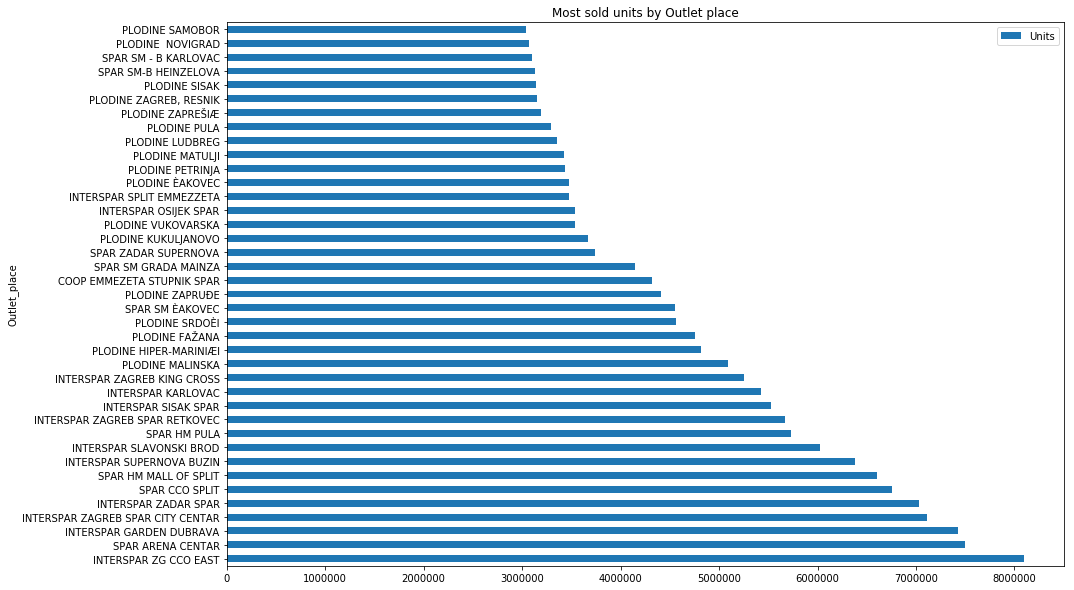

In [150]:
data_city_3000.plot(kind ="barh", x = 'Outlet_place', y = 'Units', figsize=(15,10), title='Most sold units by Outlet place')

In [151]:
data_outlettype=data.groupby(['Outlet_type'], as_index=False).Units.sum()

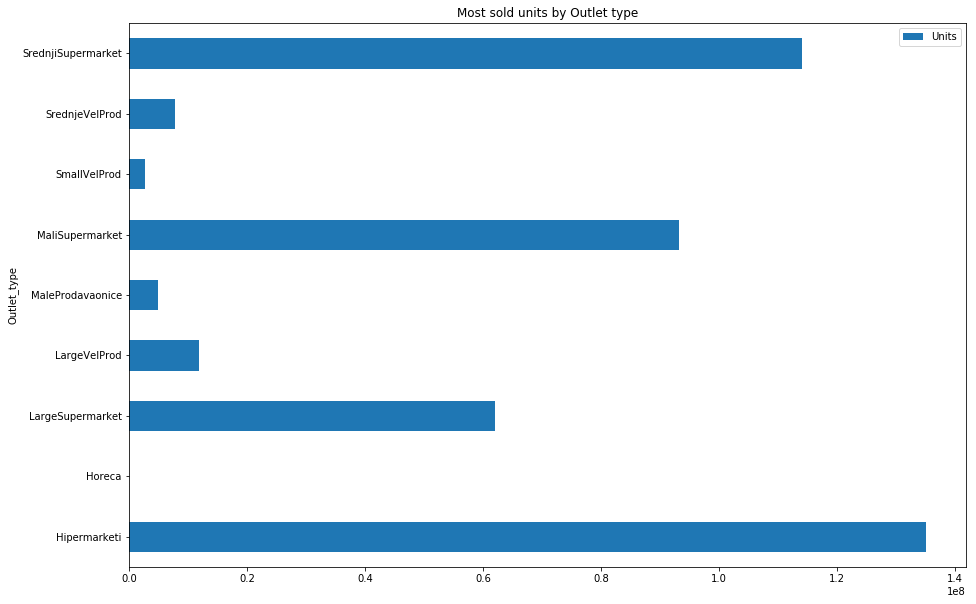

In [152]:
data_outlettype.plot(kind ="barh", x = 'Outlet_type', y = 'Units', figsize=(15,10), title='Most sold units by Outlet type')

Most significant ones are hipermarketi, largesuperm, mali supermarket,srednji supermarket.

In [153]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data['Outlet']=le.fit_transform(data.Outlet)
data['Item_name']=le.fit_transform(data.Item_name)

Label : 
1. Outlet: * 0-plodine, *1 - spar
2. SMoki:* 1 - 250 g, * 2 - 40g, * 3 - 130 g

In [154]:
data.head()

,Date,Item_name,Item_code,Outlet,Outlet_place,Outlet_type,Katalog,Units,Returned
0,2017-01-01,1,6207691,0,PLODINE RAB,MaliSupermarket,0,0,0
1,2018-01-01,1,6207691,0,PLODINE RAB,MaliSupermarket,1,11146,0
2,2019-01-01,1,6207691,0,PLODINE RAB,MaliSupermarket,1,11465,0
3,2017-02-01,1,6207691,0,PLODINE RAB,MaliSupermarket,0,0,0
4,2018-02-01,1,6207691,0,PLODINE RAB,MaliSupermarket,0,8599,0


In [155]:
data=data.drop(columns='Item_code')

In [156]:
data.head()

,Date,Item_name,Outlet,Outlet_place,Outlet_type,Katalog,Units,Returned
0,2017-01-01,1,0,PLODINE RAB,MaliSupermarket,0,0,0
1,2018-01-01,1,0,PLODINE RAB,MaliSupermarket,1,11146,0
2,2019-01-01,1,0,PLODINE RAB,MaliSupermarket,1,11465,0
3,2017-02-01,1,0,PLODINE RAB,MaliSupermarket,0,0,0
4,2018-02-01,1,0,PLODINE RAB,MaliSupermarket,0,8599,0


In [157]:
data_ot = pd.get_dummies(data['Outlet_type'])
data = pd.concat([data, data_ot], axis=1)

In [158]:
data.head()

,Date,Item_name,Outlet,Outlet_place,Outlet_type,Katalog,Units,Returned,Hipermarketi,Horeca,LargeSupermarket,LargeVelProd,MaleProdavaonice,MaliSupermarket,SmallVelProd,SrednjeVelProd,SrednjiSupermarket
0,2017-01-01,1,0,PLODINE RAB,MaliSupermarket,0,0,0,0,0,0,0,0,1,0,0,0
1,2018-01-01,1,0,PLODINE RAB,MaliSupermarket,1,11146,0,0,0,0,0,0,1,0,0,0
2,2019-01-01,1,0,PLODINE RAB,MaliSupermarket,1,11465,0,0,0,0,0,0,1,0,0,0
3,2017-02-01,1,0,PLODINE RAB,MaliSupermarket,0,0,0,0,0,0,0,0,1,0,0,0
4,2018-02-01,1,0,PLODINE RAB,MaliSupermarket,0,8599,0,0,0,0,0,0,1,0,0,0


In [159]:
data_op = pd.get_dummies(data['Outlet_place'])
data = pd.concat([data, data_op], axis=1)

In [160]:
data.head()

,Date,Item_name,Outlet,Outlet_place,Outlet_type,Katalog,Units,Returned,Hipermarketi,Horeca,...,SPAR SPLIT LIÈKA,SPAR VALPOVO,SPAR VARAŽDIN SUPERNOVA,SPAR ZADAR SUPERNOVA,SPAR ZG PIÈMANOVA 87052,SPAR ZG SREDIŠÆE,SPAR ZG VLAŠKA,SUPERMARKET SPAR RIJEKA,SUPERMARKET SPAR ZADAR CITY GALLER.,SUPERMARKET SPAR ZG JURIŠIÈEVA
0,2017-01-01,1,0,PLODINE RAB,MaliSupermarket,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-01,1,0,PLODINE RAB,MaliSupermarket,1,11146,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01,1,0,PLODINE RAB,MaliSupermarket,1,11465,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-02-01,1,0,PLODINE RAB,MaliSupermarket,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-02-01,1,0,PLODINE RAB,MaliSupermarket,0,8599,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
data=data.set_index('Date')

In [162]:
data.head()

,Item_name,Outlet,Outlet_place,Outlet_type,Katalog,Units,Returned,Hipermarketi,Horeca,LargeSupermarket,...,SPAR SPLIT LIÈKA,SPAR VALPOVO,SPAR VARAŽDIN SUPERNOVA,SPAR ZADAR SUPERNOVA,SPAR ZG PIÈMANOVA 87052,SPAR ZG SREDIŠÆE,SPAR ZG VLAŠKA,SUPERMARKET SPAR RIJEKA,SUPERMARKET SPAR ZADAR CITY GALLER.,SUPERMARKET SPAR ZG JURIŠIÈEVA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1,0,PLODINE RAB,MaliSupermarket,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-01,1,0,PLODINE RAB,MaliSupermarket,1,11146,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01,1,0,PLODINE RAB,MaliSupermarket,1,11465,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-01,1,0,PLODINE RAB,MaliSupermarket,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-02-01,1,0,PLODINE RAB,MaliSupermarket,0,8599,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
data=data.drop(columns=['Outlet_place','Outlet_type'])

In [164]:
X_data=data.drop(columns='Units')

In [165]:
y_data=data.Units

In [166]:
from sklearn.ensemble import RandomForestRegressor

In [167]:
model = RandomForestRegressor(n_estimators=200, random_state=1)
model.fit(X_data, y_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [168]:
names = data.columns.values

In [169]:
feature_importances=pd.DataFrame(model.feature_importances_)

In [170]:
feature_importances.index=data.drop(columns='Units').columns

In [171]:
feature_importances.columns=['feature_importance']

In [172]:
feature_importances.head()

,feature_importance
Item_name,0.123095
Outlet,0.066181
Katalog,0.039258
Returned,0.004106
Hipermarketi,0.290265


In [173]:
feature_importances = feature_importances.sort_values(by = "feature_importance", ascending = False)

In [174]:
feature_importances.head()

,feature_importance
Hipermarketi,0.290265
Item_name,0.123095
Outlet,0.066181
Katalog,0.039258
COOP EMMEZETA OSIJEK SPAR,0.024374


In [175]:
feature_importances[feature_importances.feature_importance > 0.01]

,feature_importance
Hipermarketi,0.290265
Item_name,0.123095
Outlet,0.066181
Katalog,0.039258
COOP EMMEZETA OSIJEK SPAR,0.024374
SPAR HM RIJEKA TOWER,0.018739
PLODINE FAŽANA,0.018182
PLODINE MALINSKA,0.017187
SPAR HM RUJEVICA,0.016647
INTERSPAR KOPRIVNICA,0.014855


In [176]:
feat_imp_top=feature_importances[feature_importances.feature_importance > 0.01]

In [177]:
data_new=data[feat_imp_top.index]

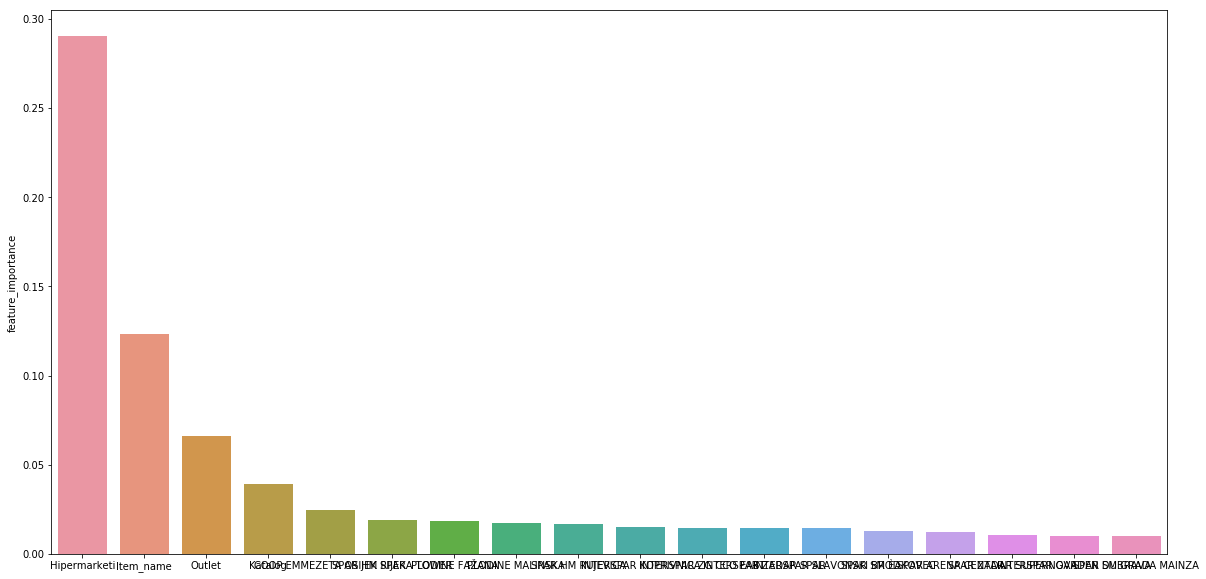

In [178]:
plt.figure(figsize=(20,10))
sns.barplot(x=feat_imp_top.index, y=feat_imp_top.feature_importance)

In [179]:
X_new=X_data[feat_imp_top.index]

In [180]:
X_new.head()

,Hipermarketi,Item_name,Outlet,Katalog,COOP EMMEZETA OSIJEK SPAR,SPAR HM RIJEKA TOWER,PLODINE FAŽANA,PLODINE MALINSKA,SPAR HM RUJEVICA,INTERSPAR KOPRIVNICA,INTERSPAR ZG CCO EAST,INTERSPAR ZADAR SPAR,INTERSPAR SLAVONSKI BROD,SPAR SM ÈAKOVEC,SPAR ARENA CENTAR,SPAR ZADAR SUPERNOVA,INTERSPAR GARDEN DUBRAVA,SPAR SM GRADA MAINZA
Date,,,,,,,,,,,,,,,,,,
2017-01-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-01-01,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-01-01,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-02-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-02-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [182]:
X_new.shape

(15795, 18)

In [183]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_new,y_data, train_size=0.8, test_size=0.2, random_state=0)

In [184]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [185]:
prediction = reg.predict(X_test)

In [186]:
mean_squared_error(y_true=y_test,
                   y_pred=prediction)

803317850.5632458

In [187]:
mean_absolute_error(y_true=y_test,
                   y_pred=prediction)

18877.233084663858

In [188]:
y_test_df=pd.DataFrame(y_test)

In [189]:
y_test_df.columns=['Units']

In [190]:
y_test_df['predicted']=prediction

In [191]:
y_test_df=y_test_df.groupby(y_test_df.index)['Units','predicted'].sum()

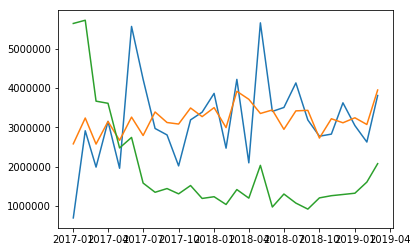

In [192]:
plt.plot(y_test_df.Units)
plt.plot(y_test_df.predicted)
plt.plot(predictions_ARIMA.Units)

XGBoost is much better model for predicting! Can we do better?

In [193]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [194]:
from xgboost.sklearn import XGBRegressor

In [232]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [233]:
model2 = XGBRegressor(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=1)
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 0)

random_search = RandomizedSearchCV(model2, param_distributions=params, n_iter=param_comb, n_jobs=1,cv=5, verbose=3, random_state=0 )
random_search.fit(X_train, y_train)
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('smoki.csv', index=False)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] subsample=1.0, min_child_weight=5, max_depth=5, gamma=5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=1.0, min_child_weight=5, max_depth=5, gamma=5, colsample_bytree=1.0, score=0.3024863489242414, total=   4.2s
[CV] subsample=1.0, min_child_weight=5, max_depth=5, gamma=5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV]  subsample=1.0, min_child_weight=5, max_depth=5, gamma=5, colsample_bytree=1.0, score=0.2986254941061196, total=   4.5s
[CV] subsample=1.0, min_child_weight=5, max_depth=5, gamma=5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[CV]  subsample=1.0, min_child_weight=5, max_depth=5, gamma=5, colsample_bytree=1.0, score=0.35065666497899595, total=   4.2s
[CV] subsample=1.0, min_child_weight=5, max_depth=5, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, min_child_weight=5, max_depth=5, gamma=5, colsample_bytree=1.0, score=0.2319486554873402, total=   4.1s
[CV] subsample=1.0, min_child_weight=5, max_depth=5, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, min_child_weight=5, max_depth=5, gamma=5, colsample_bytree=1.0, score=0.3043001056667566, total=   4.3s
[CV] subsample=0.8, min_child_weight=5, max_depth=5, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, min_child_weight=5, max_depth=5, gamma=2, colsample_bytree=0.8, score=0.3068856794851552, total=   4.3s
[CV] subsample=0.8, min_child_weight=5, max_depth=5, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, min_child_weight=5, max_depth=5, gamma=2, colsample_bytree=0.8, score=0.29879342086526695, total=   4.5s
[CV] subsample=0.8, min_child_weight=

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.6min finished



 All results:
{'mean_fit_time': array([4.29176702, 4.36139874, 2.61452603, 3.32649608, 3.49554276]), 'std_fit_time': array([0.11258655, 0.09031511, 0.04957906, 0.38694137, 0.82832792]), 'mean_score_time': array([0.06974077, 0.06569481, 0.03343992, 0.05754676, 0.07328892]), 'std_score_time': array([0.00422729, 0.00511096, 0.00245257, 0.00587072, 0.01844007]), 'param_subsample': masked_array(data=[1.0, 0.8, 0.6, 1.0, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 5, 10, 5, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[5, 5, 3, 4, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 2, 1.5, 2, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            

C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\utils\de

In [314]:
model_real=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=10, missing=None, n_estimators=400,
       n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0)

In [315]:
model_real.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=10, missing=None, n_estimators=400,
       n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0)

In [316]:
pred_real=model_real.predict(X_test)

In [317]:
mean_squared_error(y_test,pred_real)

800797745.1750523

In [318]:
mean_absolute_error(y_test,pred_real)

18843.294660036307

In [319]:
y_test_real=pd.DataFrame(y_test)

In [320]:
y_test_real['predicted']=pred_real

In [321]:
y_test_real.head()

,Units,predicted
Date,,
2017-08-01,0,20254.058594
2018-07-01,40127,13310.049805
2018-09-01,157643,85202.265625
2019-01-01,4459,23843.462891
2017-12-01,8917,26313.378906


In [322]:
y_test_real=y_test_real.groupby(y_test_real.index)['Units','predicted'].sum()

In [323]:
y_test_real.head()

,Units,predicted
Date,,
2017-01-01,695604,2556080.50
2017-02-01,2913945,3241182.25
2017-03-01,1988784,2566415.50
2017-04-01,3152991,3158922.25
2017-05-01,1959613,2649071.25


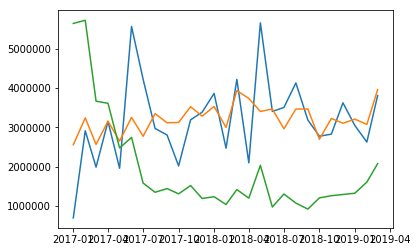

In [324]:
plt.plot(y_test_real.Units)
plt.plot(y_test_real.predicted)
plt.plot(predictions_ARIMA.Units)

In [325]:
mean_absolute_error(y_test_real.Units, y_test_real.predicted)

659397.0

2. predicting separately for each item.

2. SMoki:* 1 - 250 g, * 2 - 40g, * 3 - 130 g

# SMOKI 250g

In [332]:
data_250=pd.DataFrame(data)

In [333]:
data_250=data_250[data_250.Item_name==1]

In [334]:
X_data_250=data_250[feat_imp_top.index]

In [335]:
y_data_250=data_250.Units

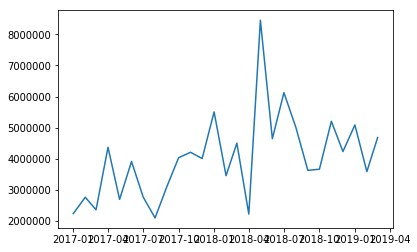

In [337]:
plt.plot(data_250.groupby('Date').Units.sum())

In [338]:
X_train,X_test,y_train,y_test=train_test_split(X_data_250,y_data_250, train_size=0.8, test_size=0.2, random_state=0)

In [339]:
model_250=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=10, missing=None, n_estimators=400,
       n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0)

In [340]:
model_250.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=10, missing=None, n_estimators=400,
       n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0)

In [341]:
pred_250=model_250.predict(X_test)

In [342]:
mean_absolute_error(y_test, pred_250)

14195.954330632716

In [344]:
pred_df_250=pd.DataFrame(y_test)

In [345]:
pred_df_250['predicted']=pred_250

In [348]:
pred_df_250=pred_df_250.groupby('Date')['Units','predicted'].sum()

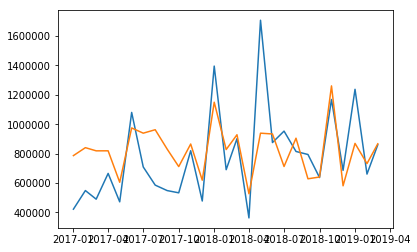

In [349]:
plt.plot(pred_df_250.Units)
plt.plot(pred_df_250.predicted)

In [377]:
mean_absolute_error(pred_df_250.Units, pred_df_250.predicted)

192042.71527777778

In [350]:
X_test.head()

,Hipermarketi,Item_name,Outlet,Katalog,COOP EMMEZETA OSIJEK SPAR,SPAR HM RIJEKA TOWER,PLODINE FAŽANA,PLODINE MALINSKA,SPAR HM RUJEVICA,INTERSPAR KOPRIVNICA,INTERSPAR ZG CCO EAST,INTERSPAR ZADAR SPAR,INTERSPAR SLAVONSKI BROD,SPAR SM ÈAKOVEC,SPAR ARENA CENTAR,SPAR ZADAR SUPERNOVA,INTERSPAR GARDEN DUBRAVA,SPAR SM GRADA MAINZA
Date,,,,,,,,,,,,,,,,,,
2018-09-01,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-05-01,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-05-01,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-02-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-11-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [352]:
X_test.shape

(1053, 18)

In [357]:
test=pd.read_csv('test.csv', header=None)

In [358]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1/04/2019,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1/05/2019,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1/06/2019,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1/07/2019,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1/08/2019,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [360]:
test['Date']=pd.to_datetime(test[0], infer_datetime_format=True)

In [361]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Date
0,1/04/2019,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2019-01-04
1,1/05/2019,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2019-01-05
2,1/06/2019,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2019-01-06
3,1/07/2019,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2019-01-07
4,1/08/2019,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2019-01-08


In [363]:
test=test.set_index('Date')

In [364]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Date,,,,,,,,,,,,,,,,,,,
2019-01-04,1/04/2019,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-01-05,1/05/2019,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-01-06,1/06/2019,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-01-07,1/07/2019,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-01-08,1/08/2019,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [365]:
test=test.drop(columns=0)

In [366]:
test.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Date,,,,,,,,,,,,,,,,,,
2019-01-04,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-01-05,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-01-06,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-01-07,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-01-08,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [368]:
test.columns=X_test.columns

In [370]:
test.head()

,Hipermarketi,Item_name,Outlet,Katalog,COOP EMMEZETA OSIJEK SPAR,SPAR HM RIJEKA TOWER,PLODINE FAŽANA,PLODINE MALINSKA,SPAR HM RUJEVICA,INTERSPAR KOPRIVNICA,INTERSPAR ZG CCO EAST,INTERSPAR ZADAR SPAR,INTERSPAR SLAVONSKI BROD,SPAR SM ÈAKOVEC,SPAR ARENA CENTAR,SPAR ZADAR SUPERNOVA,INTERSPAR GARDEN DUBRAVA,SPAR SM GRADA MAINZA
Date,,,,,,,,,,,,,,,,,,
2019-01-04,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-01-05,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-01-06,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-01-07,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-01-08,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [371]:
predikcije_smoki_250=model_250.predict(test)

In [372]:
predikcije_smoki_250

array([53624.695, 53624.695, 59130.934, 53624.695, 59130.934, 53624.695,
       53624.695, 53624.695, 53624.695], dtype=float32)

Real data from first 3 month of sold units are 70-85000 which means that accuracy is about 69-75%